In [121]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import scipy.signal
from rich import print


---
# VIDEO: Mean-smooth a time series
---


### Create Signal

time = [0.000e+00 1.000e-03 2.000e-03 ... 2.997e+00 2.998e+00 2.999e+00]

n = 3000

np.linspace(0,p,n) = [0.00000000e+00 5.00166722e-03 1.00033344e-02 ... 1.49899967e+01
 1.49949983e+01 1.50000000e+01]

np.arange(0,p) = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

np.random.rand(p) = [0.82009057 0.07874933 0.74316261 0.57934796 0.60029814 0.61626883
 0.39711943 0.25482682 0.83889537 0.68599042 0.20832582 0.35984265
 0.42626751 0.40701088 0.71996386]

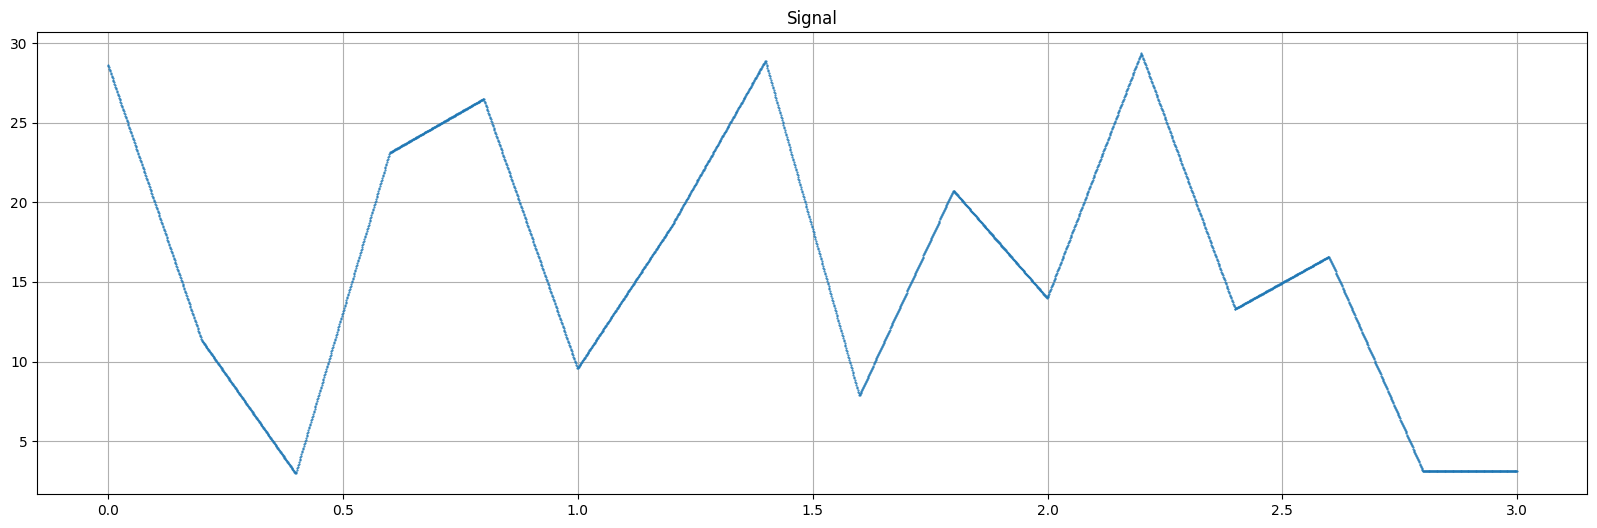

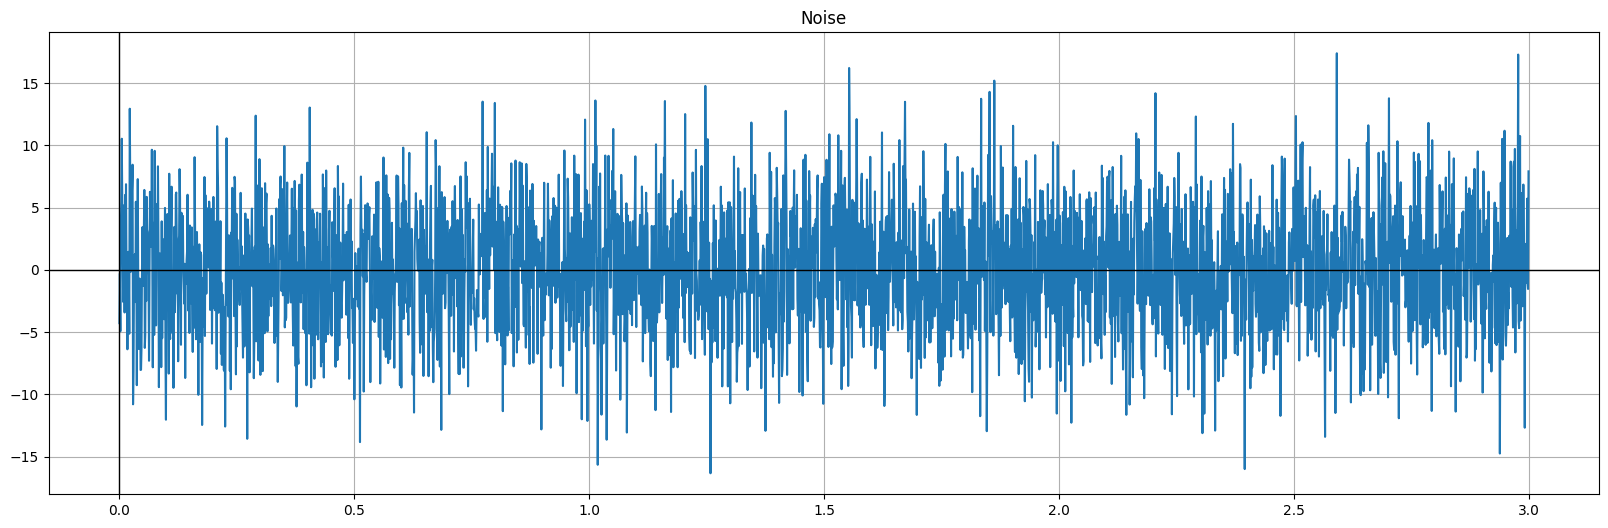

In [122]:
srate = 1000  # Hz
time = np.arange(0, 3, 1 / srate)  #  [0.000e+00 1.000e-03 2.000e-03 ... 2.997e+00 2.998e+00 2.999e+00]
n = len(time)  # 3000
p = 15  # poles for random interpolation

print(f"time = {time}")
print(f"n = {n}")

# amplitude modulator and noise level
print(f"np.linspace(0,p,n) = {np.linspace(0, p, n)}")
print(f"np.arange(0,p) = {np.arange(0, p)}")
print(f"np.random.rand(p) = {np.random.rand(p)}")

ampl = np.interp(
    x=np.linspace(0, p, n),  # 3000 points to interpolate
    xp=np.arange(0, p),  # 15 points, x-axis of the interpolation
    fp=np.random.rand(p) * 30  # 15 random points, y-axis of the interpolation
)

# noise level, measured in standard deviations
noiseamp = 5
noise = noiseamp * np.random.randn(n)
signal = ampl + noise

plt.figure(figsize=(20, 6))

plt.plot(time, ampl, '.', label="Amplitude", markersize=1)
plt.title("Signal")
plt.grid()
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(time, noise)
plt.title("Noise")
# draw the x-axis at y=0
plt.grid()
plt.axhline(0, color="k", linestyle="-", linewidth=1)
plt.axvline(0, color="k", linestyle="-", linewidth=1)
plt.show()

### Implement the running mean filter

windowsize = 41.0 ms

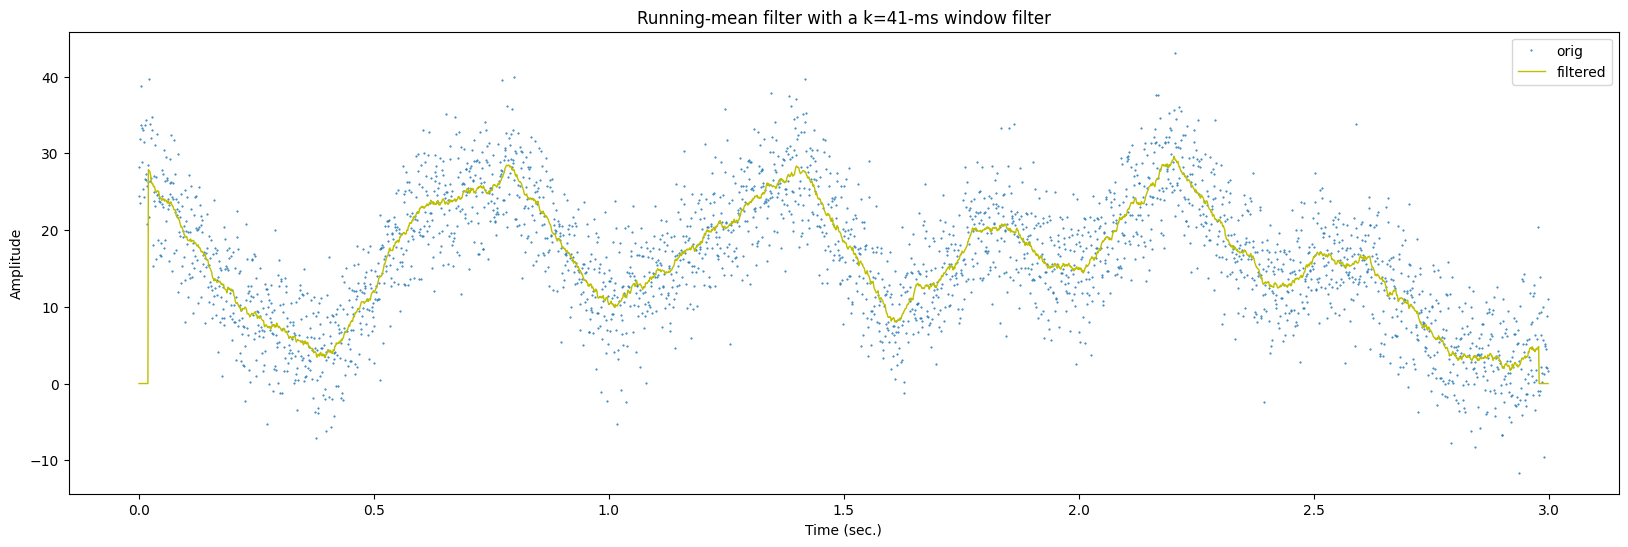

In [123]:
# initialize filtered signal vector
filtsig = np.zeros(n)  # 3000 zeros

# implement the running mean filter
k = 20  # filter window is actually k*2+1
for i in range(k, n - k):
    # each point is the average of k surrounding points
    filtsig[i] = np.mean(signal[i - k: i + k + 1])  # 2k+1 points

windowsize_sec = (k * 2 + 1) / srate  # [samples] / [samples/sec] = [sec]
windowsize = 1000 * windowsize_sec  # [ms/sec] * [samples] / [samples/sec] = [ms]

print(f"windowsize = {windowsize} ms")

plt.figure(figsize=(20, 6))
# plot the noisy and filtered signals
plt.plot(time, signal, '.', label="orig", markersize=1)
plt.plot(time, filtsig, label="filtered", color="y", linewidth=1)

plt.legend()
plt.xlabel("Time (sec.)")
plt.ylabel("Amplitude")
plt.title("Running-mean filter with a k=%d-ms window filter" % windowsize)

plt.show()


---
# VIDEO: Gaussian-smooth a time series
---


### Create Signal

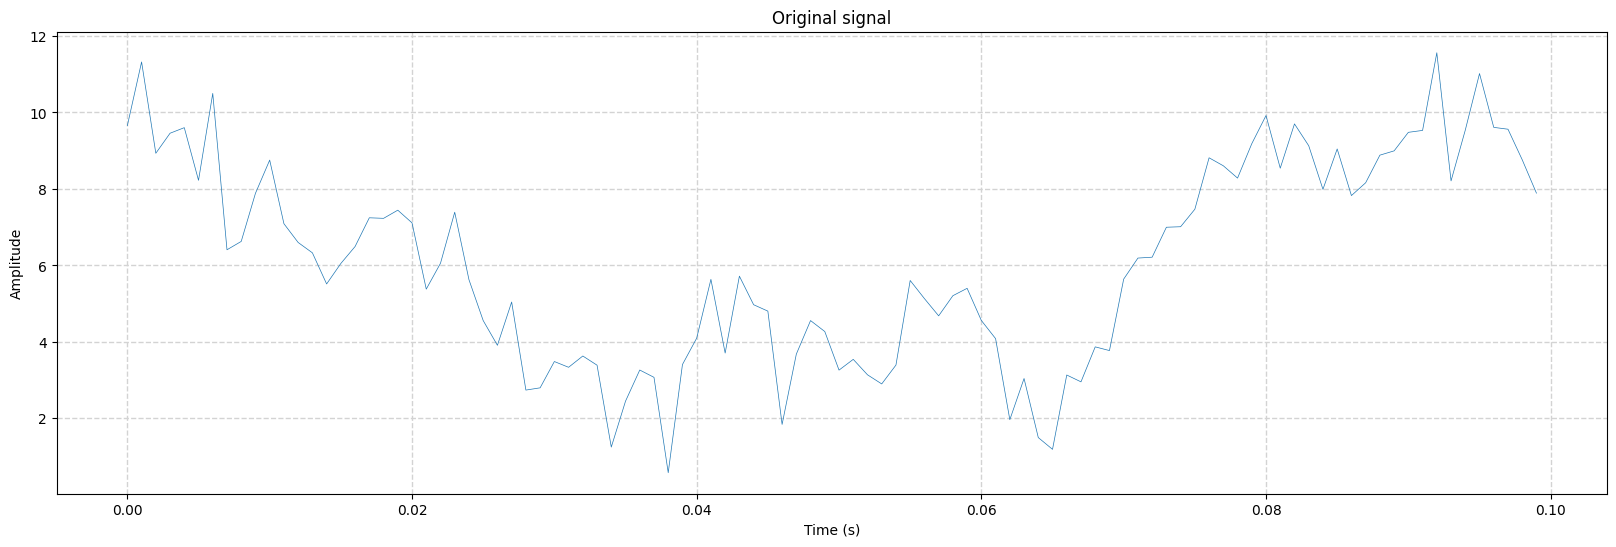

In [124]:
srate = 1000  # Hz
time = np.arange(0, 0.1, 1 / srate)
n = len(time)
p = 15  # poles for random interpolation

# noise level, measured in standard deviations
noiseamp = 1

# amplitude modulator and noise level
ampl = np.interp(np.linspace(1, p, n), np.arange(0, p), np.random.rand(p) * 10)
noise = noiseamp * np.random.randn(n)
signal = ampl + noise

# plot the signal
plt.figure(figsize=(20, 6))
plt.plot(time, signal, '-', markersize=1, linewidth=.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original signal")
# a very light grid
plt.grid(color="#D3D3D3", linestyle="--", linewidth=1)
plt.show()

### Create Gaussian kernel

In [125]:
# full-width half-maximum: the key Gaussian parameter
fwhm = 10  # in ms

# normalized time vector in ms
k = 10
# in this case, the time value in ms is equal to the sample number (srate = 1000)
gtime = 1000 * np.arange(-k, 1) / srate  # 81 points: -40 to 40

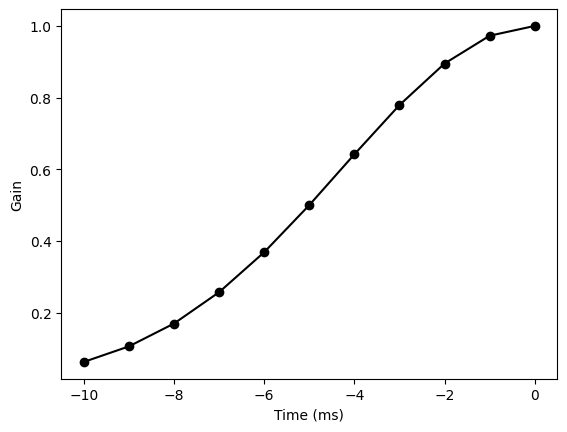

In [126]:
# Create Gaussian window
gauswin = np.exp(-(4 * np.log(2) * gtime ** 2) / fwhm ** 2)

# show the Gaussian
plt.plot(gtime, gauswin, "ko-")

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)
# title([ 'Gaussian kernel with requeted FWHM ' num2str(fwhm) ' ms (' num2str(empFWHM) ' ms achieved)' ])
plt.xlabel("Time (ms)")
plt.ylabel("Gain")

plt.show()

## implement the filter

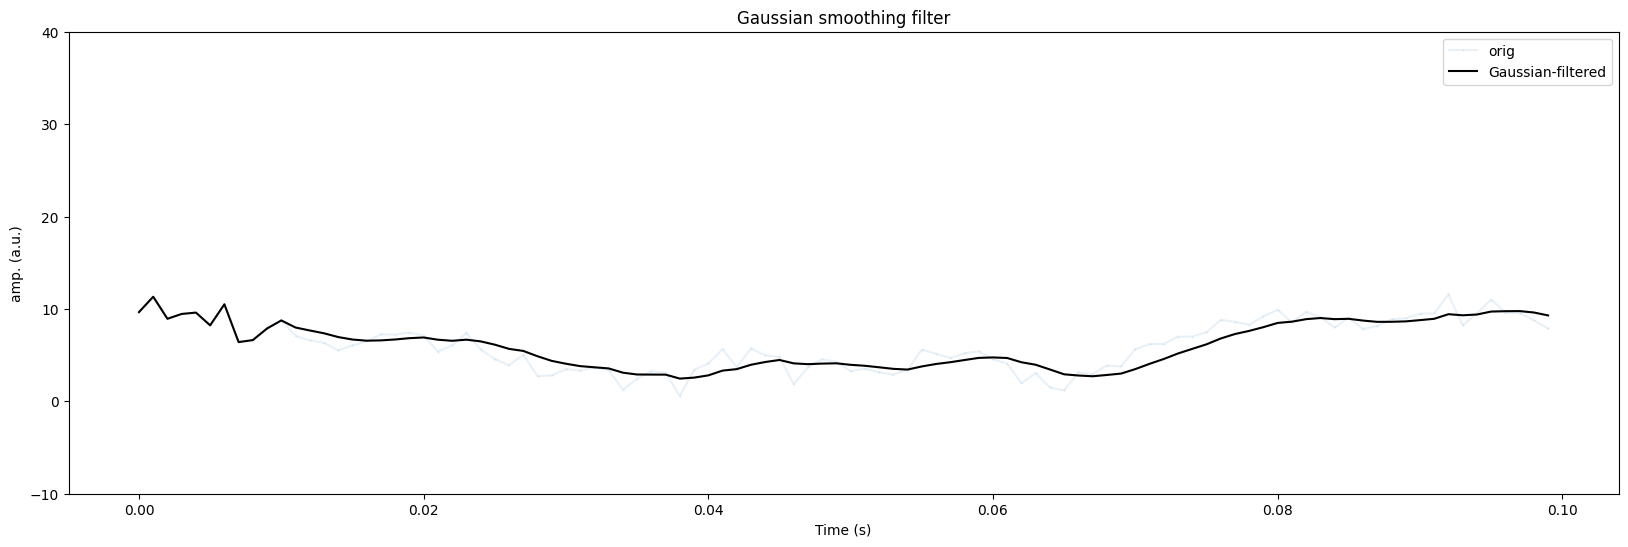

In [127]:
# initialize filtered signal vector
filtsigG = signal.copy()

# implement the running mean filter
for i in range(k + 1, n):
    # each point is the weighted average of k surrounding points
    filtsigG[i] = np.sum(signal[i - k: i + 1] * gauswin)

# plot
plt.figure(figsize=(20, 6))
# plt.plot(time, signal, "r", label="Original")
plt.plot(time, signal, '.-', label="orig", markersize=1, alpha=0.1)
plt.plot(time, filtsigG, "k", label="Gaussian-filtered")

plt.xlabel("Time (s)")
plt.ylabel("amp. (a.u.)")
plt.legend()
plt.title("Gaussian smoothing filter")
plt.ylim([-10, 40])
plt.show()


ValueError: x and y must have same first dimension, but have shapes (100,) and (3000,)

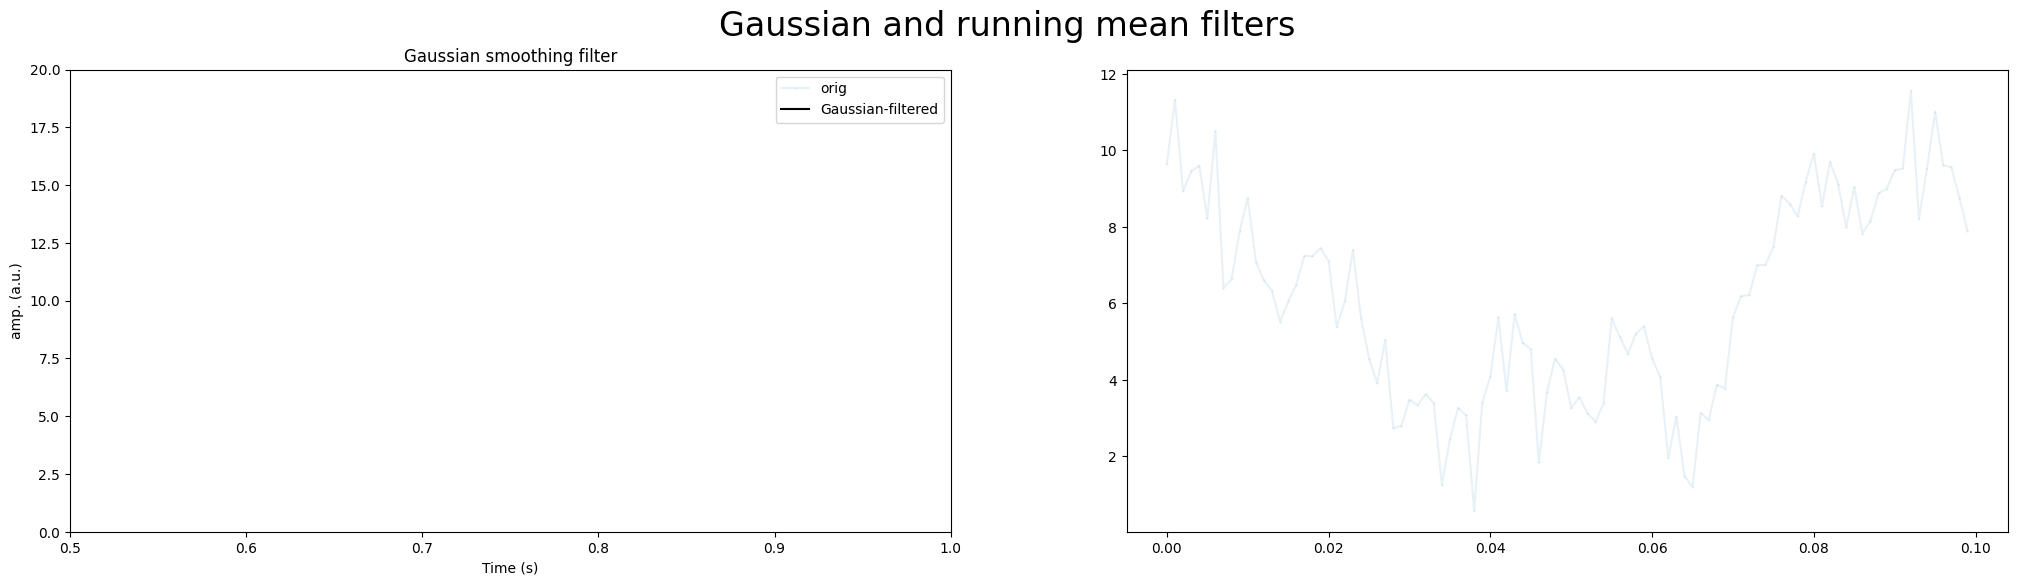

In [128]:
## plot the two filters together from 0.5 to 1.0 seconds
plt.figure(figsize=(25, 6))

plt.suptitle("Gaussian and running mean filters", fontsize=24)

plt.subplot(121)
plt.plot(time, signal, '.-', label="orig", markersize=1, alpha=0.1)
plt.plot(time, filtsigG, "k", label="Gaussian-filtered")
plt.title("Gaussian smoothing filter")
plt.xlabel("Time (s)")
plt.ylabel("amp. (a.u.)")
plt.legend()
plt.ylim([0, 20])
plt.xlim([0.5, 1.0])

plt.subplot(122)
plt.plot(time, signal, '.-', label="orig", markersize=1, alpha=0.1)
plt.plot(time, filtsigMean, "k", label="Running mean")
plt.title("Running mean filter")
plt.xlabel("Time (s)")
plt.ylabel("amp. (a.u.)")
plt.legend()
plt.ylim([0, 20])
plt.xlim([0.5, 1.0])

plt.show()

In [ ]:
# make an FFT of the original and filtered signals

# frequencies
hz = np.linspace(0, srate / 2, int(np.floor(n / 2) + 1))

# FFT of original signal
signalX = np.fft.fft(signal) / n
signalX = signalX[0 : len(hz)]

# FFT of Gaussian-filtered signal
filtsigGX = np.fft.fft(filtsigG) / n
filtsigGX = filtsigGX[0 : len(hz)]

# FFT of running-mean-filtered signal
filtsigMeanX = np.fft.fft(filtsigMean) / n
filtsigMeanX = filtsigMeanX[0 : len(hz)]

# plot using loglog
plt.figure(figsize=(20, 6))
# use loglog scale
plt.loglog(hz, np.abs(signalX), "r", label="Original")
plt.loglog(hz, np.abs(filtsigGX), "k", label="Gaussian")
plt.loglog(hz, np.abs(filtsigMeanX), "b", label="Running mean")

plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency domain")
plt.legend()
plt.grid()
plt.show()


---
# VIDEO: Gaussian-smooth a spike time series
---


In [ ]:
## generate time series of random spikes

# number of spikes
n = 300

random_nums = np.random.randn(n)

# plot the random numbers
plt.figure(figsize=(20, 6))
plt.axhline(0, color="k", linestyle="--")
plt.axhline(1, color="y", linestyle="--", label="y=1")
plt.legend()
plt.plot(random_nums, "ko-")
plt.ylim([-10, 10])

In [ ]:
# exponential of random numbers
random_exp = np.exp(random_nums)
# inter-spike intervals (exponential distribution for bursts)
isi = np.round(random_exp * 10)

plt.figure(figsize=(20, 6))
plt.axhline(0, color="k", linestyle="--")
plt.plot(random_exp, "ko-")
plt.axhline(1, color="y", linestyle="--")
plt.ylim([-10, 10])
plt.show()


Al tomar la exponencial de la señal de ruido, todos los valores son ahora positivos. Además, la distribución exponencial significa que la mayoría de los valores son cercanos a cero, pero algunos valores son mucho más grandes. Esto es lo que se espera de una señal de ruido de tipo "ráfaga" (es decir, una señal que tiene ráfagas de actividad, seguidas de períodos de silencio). 

Para convertir estos valores en intervalos de tiempo entre ráfagas, simplemente multiplicamos por un factor de escala (en este caso, 10). Esto convierte los valores en intervalos de tiempo en milisegundos.

El tiempo en el que ocurrirán los spikes es la suma acumulada de los intervalos de tiempo entre ráfagas. Como la mayoría de los intervalos de tiempo son pequeños, la suma acumulada aumentará lentamente, agrupando los spikes en el tiempo. 

Sin embargo, cuando se encuentre con un intervalo de tiempo grande, la suma acumulada aumentará rápidamente, creando un nuevo grupo de spikes separado en el tiempo del grupo anterior. Cada grupo de spikes se llama "ráfaga".

In [ ]:
# histograms of the random numbers and the inter-spike intervals
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(random_nums, 50)
plt.title("Random numbers")

plt.subplot(122)
plt.hist(random_exp, 50)
plt.title("exponential of random numbers")
plt.show()

En el histograma exponencial, se observa que la mayoría de los valores están cerca de cero, pero algunos valores son mucho más grandes. Como estos valores representan intervalos de tiempo entre ráfagas, esto significa que la mayoría de los pulsos estarán agrupados entre sí, pero ocasionalmente habrá un intervalo de tiempo largo que separará dos grupos de pulsos. Estos grupos constituyen las ráfagas de actividad.

In [ ]:
# generate spike time series
spikets = np.zeros(int(sum(isi)))  # the number of spikes will be the sum of the inter-spike intervals

spikets_indexes = []

for i in range(0, n):  # n = 300
    spicket_index = int(np.sum(isi[0:i]))
    spikets_indexes.append(spicket_index)
    spikets[spicket_index] = 1

# plot
plt.figure(figsize=(25, 2))
plt.plot(spikets)
plt.xlabel("Time (a.u.)")  # a.u. stands for arbitrary units
plt.show()

In [ ]:
## create and implement Gaussian window

# full-width half-maximum: the key Gaussian parameter
fwhm = 25  # in points

# normalized time vector in points
k = 100
gtime = np.arange(-k, k + 1)

# create Gaussian window
gauswin = np.exp(-(4 * np.log(2) * gtime ** 2) / fwhm ** 2)
gauswin = gauswin / np.sum(gauswin)

# initialize filtered signal vector
filtsigG = np.zeros(len(spikets))

# implement the weighted running mean filter
for i in range(k + 1, len(spikets) - k):
    filtsigG[i] = np.sum(spikets[i - k: i + k + 1] * gauswin)

# plot the filtered signal (spike probability density)
plt.figure(figsize=(25, 2))
plt.plot(spikets, "b", label="spikes")
plt.plot(filtsigG, "r", label="spike p.d.")
plt.legend()
plt.title("Spikes and spike probability density")
plt.show()


---
# VIDEO: Denoising via TKEO
---


In [ ]:
# import data
emgdata = sio.loadmat("emg4TKEO.mat")

# extract needed variables
emgtime = emgdata["emgtime"][0]
emg = emgdata["emg"][0]

# initialize filtered signal
emgf = copy.deepcopy(emg)

# the loop version for interpretability
for i in range(1, len(emgf) - 1):
    emgf[i] = emg[i] ** 2 - emg[i - 1] * emg[i + 1]

# the vectorized version for speed and elegance
emgf2 = copy.deepcopy(emg)
emgf2[1:-1] = emg[1:-1] ** 2 - emg[0:-2] * emg[2:]

## convert both signals to zscore

# find timepoint zero
time0 = np.argmin(emgtime ** 2)

# convert original EMG to z-score from time-zero
emgZ = (emg - np.mean(emg[0:time0])) / np.std(emg[0:time0])

# same for filtered EMG energy
emgZf = (emgf - np.mean(emgf[0:time0])) / np.std(emgf[0:time0])

## plot
# plot "raw" (normalized to max.1)
plt.plot(emgtime, emg / np.max(emg), "b", label="EMG")
plt.plot(emgtime, emgf / np.max(emgf), "m", label="TKEO energy")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude or energy")
plt.legend()

plt.show()

# plot zscored
plt.plot(emgtime, emgZ, "b", label="EMG")
plt.plot(emgtime, emgZf, "m", label="TKEO energy")

plt.xlabel("Time (ms)")
plt.ylabel("Zscore relative to pre-stimulus")
plt.legend()
plt.show()


---
VIDEO: Median filter to remove spike noise
---


In [ ]:
# create signal
n = 2000
signal = np.cumsum(np.random.randn(n))

# proportion of time points to replace with noise
propnoise = 0.05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0: int(n * propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50 + np.random.rand(len(noisepnts)) * 100

# use hist to pick threshold
plt.hist(signal, 100)
plt.show()

# visual-picked threshold
threshold = 40

# find data values above the threshold
suprathresh = np.where(signal > threshold)[0]

# initialize filtered signal
filtsig = copy.deepcopy(signal)

# loop through suprathreshold points and set to median of k
k = 20  # actual window is k*2+1
for ti in range(len(suprathresh)):
    # lower and upper bounds
    lowbnd = np.max((0, suprathresh[ti] - k))
    uppbnd = np.min((suprathresh[ti] + k + 1, n))

    # compute median of surrounding points
    filtsig[suprathresh[ti]] = np.median(signal[lowbnd:uppbnd])

# plot
plt.plot(range(0, n), signal, range(0, n), filtsig)
plt.show()


---
# VIDEO: Remove linear trend
---


In [ ]:
# create signal with linear trend imposed
n = 2000
signal = np.cumsum(np.random.randn(n)) + np.linspace(-30, 30, n)

# linear detrending
detsignal = scipy.signal.detrend(signal)

# get means
omean = np.mean(signal)  # original mean
dmean = np.mean(detsignal)  # detrended mean

# plot signal and detrended signal
plt.plot(range(0, n), signal, label="Original, mean=%d" % omean)
plt.plot(range(0, n), detsignal, label="Detrended, mean=%d" % dmean)

plt.legend()
plt.show()


---
# VIDEO: Remove nonlinear trend with polynomials
---


In [ ]:
## polynomial intuition

order = 2
x = np.linspace(-15, 15, 100)

y = np.zeros(len(x))

for i in range(order + 1):
    y = y + np.random.randn(1) * x ** i

plt.plot(x, y)
plt.title("Order-%d polynomial" % order)
plt.show()

In [ ]:
## generate signal with slow polynomial artifact

n = 10000
t = range(n)
k = 10  # number of poles for random amplitudes

slowdrift = np.interp(np.linspace(1, k, n), np.arange(0, k), 100 * np.random.randn(k))
signal = slowdrift + 20 * np.random.randn(n)

# plot
plt.plot(t, signal)
plt.xlabel("Time (a.u.)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
## fit a 3-order polynomial

# polynomial fit (returns coefficients)
p = np.polyfit(t, signal, 3)

# predicted data is evaluation of polynomial
yHat = np.polyval(p, t)

# compute residual (the cleaned signal)
residual = signal - yHat

# now plot the fit (the function that will be removed)
plt.plot(t, signal, "b", label="Original")
plt.plot(t, yHat, "r", label="Polyfit")
plt.plot(t, residual, "k", label="Filtered signal")

plt.legend()
plt.show()

In [ ]:
## Bayes information criterion to find optimal order

# possible orders
orders = range(5, 40)

# sum of squared errors (sse is reserved!)
sse1 = np.zeros(len(orders))

# loop through orders
for ri in range(len(orders)):
    # compute polynomial (fitting time series)
    yHat = np.polyval(np.polyfit(t, signal, orders[ri]), t)

    # compute fit of model to data (sum of squared errors)
    sse1[ri] = np.sum((yHat - signal) ** 2) / n

# Bayes information criterion
bic = n * np.log(sse1) + orders * np.log(n)

# best parameter has lowest BIC
bestP = min(bic)
idx = np.argmin(bic)

# plot the BIC
plt.plot(orders, bic, "ks-")
plt.plot(orders[idx], bestP, "ro")
plt.xlabel("Polynomial order")
plt.ylabel("Bayes information criterion")
plt.show()

In [ ]:
## now repeat filter for best (smallest) BIC

# polynomial fit
polycoefs = np.polyfit(t, signal, orders[idx])

# estimated data based on the coefficients
yHat = np.polyval(polycoefs, t)

# filtered signal is residual
filtsig = signal - yHat

## plotting
plt.plot(t, signal, "b", label="Original")
plt.plot(t, yHat, "r", label="Polynomial fit")
plt.plot(t, filtsig, "k", label="Filtered")

plt.xlabel("Time (a.u.)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


---
# VIDEO: Averaging multiple repetitions (time-synchronous averaging)
---


In [ ]:
## simulate data

# create event (derivative of Gaussian)
k = 100  # duration of event in time points
event = np.diff(np.exp(-np.linspace(-2, 2, k + 1) ** 2))
event = event / np.max(event)  # normalize to max=1

# event onset times
Nevents = 30
onsettimes = np.random.permutation(10000 - k)
onsettimes = onsettimes[0:Nevents]

# put event into data
data = np.zeros(10000)
for ei in range(Nevents):
    data[onsettimes[ei]: onsettimes[ei] + k] = event

# add noise
data = data + 0.5 * np.random.randn(len(data))

# plot data
plt.subplot(211)
plt.plot(data)

# plot one event
plt.subplot(212)
plt.plot(range(k), data[onsettimes[3]: onsettimes[3] + k])
plt.plot(range(k), event)
plt.show()

In [ ]:
## extract all events into a matrix

datamatrix = np.zeros((Nevents, k))

for ei in range(Nevents):
    datamatrix[ei, :] = data[onsettimes[ei]: onsettimes[ei] + k]

plt.imshow(datamatrix)
plt.xlabel("Time")
plt.ylabel("Event number")
plt.title("All events")
plt.show()

plt.plot(range(0, k), np.mean(datamatrix, axis=0), label="Averaged")
plt.plot(range(0, k), event, label="Ground-truth")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Average events")
plt.show()


---
# VIDEO: Remove artifact via least-squares template-matching
---


In [ ]:
# load dataset
matdat = sio.loadmat("templateProjection.mat")
EEGdat = matdat["EEGdat"]
eyedat = matdat["eyedat"]
timevec = matdat["timevec"][0]
MN = np.shape(EEGdat)  # matrix sizes

# initialize residual data
resdat = np.zeros(np.shape(EEGdat))

# loop over trials
for triali in range(MN[1]):
    # build the least-squares model as intercept and EOG from this trial
    X = np.column_stack((np.ones(MN[0]), eyedat[:, triali]))

    # compute regression coefficients for EEG channel
    b = np.linalg.solve(X.T @ X, X.T @ EEGdat[:, triali])

    # predicted data
    yHat = X @ b

    # new data are the residuals after projecting out the best EKG fit
    resdat[:, triali] = EEGdat[:, triali] - yHat

In [ ]:
### plotting

# trial averages
plt.plot(timevec, np.mean(eyedat, axis=1), label="EOG")
plt.plot(timevec, np.mean(EEGdat, axis=1), label="EEG")
plt.plot(timevec, np.mean(resdat, 1), label="Residual")

plt.xlabel("Time (ms)")
plt.legend()
plt.show()

In [ ]:
# show all trials in a map
clim = [-1, 1] * 20

plt.subplot(131)
plt.imshow(eyedat.T)
plt.title("EOG")

plt.subplot(132)
plt.imshow(EEGdat.T)
plt.title("EOG")

plt.subplot(133)
plt.imshow(resdat.T)
plt.title("Residual")

plt.tight_layout()
plt.show()